In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Text(0, 0.5, '$y_g$')

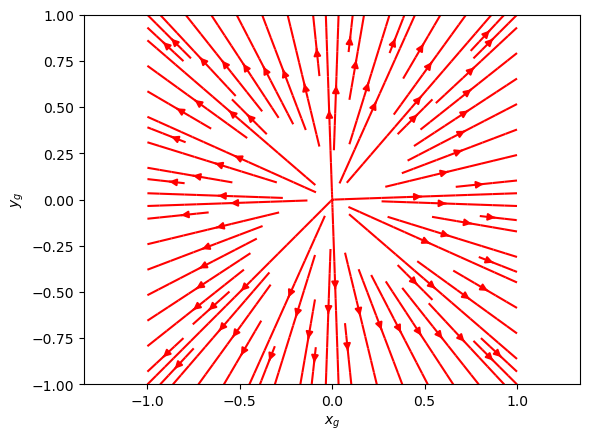

In [13]:
def Ex(x,y):
    r = np.sqrt(x**2 + y**2)
    theta = np.arctan2(y,x)
    return 1*np.cos(theta)/(r)

def Ey(x,y):
    r = np.sqrt(x**2 + y**2)
    theta = np.arctan2(y,x)
    return 1*np.sin(theta)/(r)

def Bx(x,y):
    r = np.sqrt(x**2 + y**2)
    theta = np.arctan2(y,x)
    return -1*np.sin(theta)/(r)

def By(x,y):
    r = np.sqrt(x**2 + y**2)
    theta = np.arctan2(y,x)
    return 1*np.cos(theta)/(r)


xmin = -1
ymin= -1
xmax = 1
ymax = 1
xgrid = np.linspace(xmin, xmax, 100)
ygrid = np.linspace(ymin, ymax, 100)

X, Y = np.meshgrid(xgrid, ygrid)

Ex_test = Ex(X,Y)
Ey_test = Ey(X,Y)

fig, axs = plt.subplots()

axs.streamplot(X, Y, Ex_test, Ey_test, color='red')
plt.axis('equal')
plt.xlabel(r'$x_g$')
plt.ylabel(r'$y_g$')


Text(0, 0.5, '$y_g$')

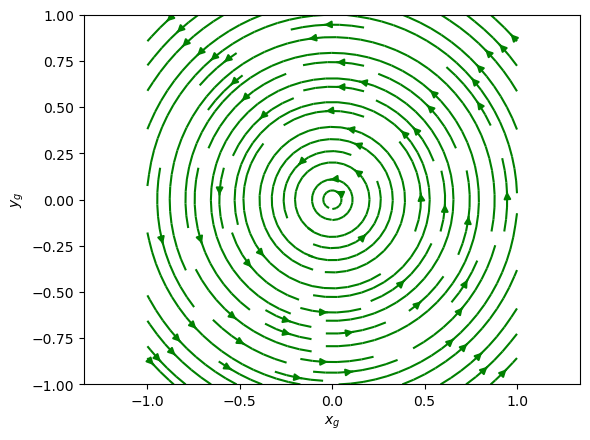

In [15]:
Bx_test = Bx(X,Y)
By_test = By(X,Y)

fig, axs = plt.subplots()

axs.streamplot(X, Y, Bx_test, By_test, color='green')
plt.axis('equal')
plt.xlabel(r'$x_g$')
plt.ylabel(r'$y_g$')

In [ ]:
W = 1 # KeV
W = W*1.6022e-19*1000 # convert to jouls
e = 1.6022e-19 # proton charge
dl = 0.001 # thickness of slab
l = 1 # distance from point source to the slab
m = 1.6726e-27  # proton mass

def alpha_E(x,y):
    front = e*dl/(2*W)
    return np.array([front*Ex(x,y), front*Ey(x,y), 0])

def alpha_B(x,y):
    lhat = np.array([x, y, l])/np.sqrt(x**2 + y**2 + l**2)
    B = np.array([Bx(x,y), By(x,y), 0])
    lcrossB = np.cross(lhat, B)
    return e*dl*lcrossB/np.sqrt(2*m*W)

def alphatot(x,y):
    return alpha_E(x,y) + alpha_B(x,y)

